In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("movies_metadata.csv")

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [4]:
import pandas as pd

user_ratings=pd.read_csv("user_ratings.csv")

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
user_ratings.drop(["Unnamed: 0","user_id"], axis=1, inplace=True)

In [6]:
user_ratings.head()

,UserID,Gender,Age,Occupation,Zip-code,movie_id,rating,timestamp
0,635,M,56,17,33785,862,5,975739061
1,635,M,56,17,33785,8844,5,975739061
2,635,M,56,17,33785,15602,4,975739111
3,635,M,56,17,33785,31357,4,975739111
4,635,M,56,17,33785,11862,5,975739306


In [7]:
user_ratings=pd.get_dummies(user_ratings, columns=["Gender"], drop_first=True)

In [48]:
user_ratings['Zip-code']=user_ratings["Zip-code"].apply(lambda x: x[:5])
user_ratings["Zip-code"]=user_ratings["Zip-code"].astype(int)

In [67]:
user_ratings.movie_id = user_ratings.movie_id.str.extract('(\d+)', expand=False)

In [73]:
user_ratings = user_ratings.dropna()

In [74]:
user_ratings.movie_id.astype(int)

0           862
1          8844
2         15602
3         31357
4         11862
5           949
6         11860
7         45325
8          9091
9           710
10         9087
11        12110
12        21032
13        10858
14         1408
15          524
16         4584
17            5
18         9273
19        11517
20         8012
21         1710
22         9691
23        12665
24          451
25        16420
26         9263
27        17015
28          902
29        37557
          ...  
45436     45527
45437    455661
45438    327237
45439     84710
45440     39562
45441     14008
45442     44330
45443     49279
45444     44333
45445     49277
45446     49271
45447     44324
45448    122036
45449     14885
45450     49280
45451    106807
45452    276895
45453    404604
45454    420346
45455     67179
45456     84419
45457    390959
45458    289923
45459    222848
45460     30840
45461    439050
45462    111109
45463     67758
45464    227506
45465    461257
Name: movie_id, Length: 

In [26]:
!env | grep PYTHONPATH

PYTHONPATH=/usr/local/Cellar/apache-spark/2.4.3/libexec/python:/usr/local/Cellar/apache-spark/2.4.3/libexec/python:/usr/local/Cellar/apache-spark/2.4.3/libexec/python:


In [27]:
import pyspark

spark = (pyspark.sql.SparkSession.builder 
  .master("local[*]")
  .getOrCreate())

In [30]:
!ls data/

LICENSE          movies.dat       requests.json    users.dat
README           ratings.json     user_ratings.csv


In [31]:
!file data/user_ratings.csv

data/user_ratings.csv: ASCII text


In [33]:
!head data/user_ratings.csv

,UserID,Gender,Age,Occupation,Zip-code,user_id,movie_id,rating,timestamp
0,635,M,56,17,33785,635,2294,5,975739061
1,635,M,56,17,33785,635,480,5,975739061
2,635,M,56,17,33785,635,3614,4,975739111
3,635,M,56,17,33785,635,920,4,975739111
4,635,M,56,17,33785,635,3528,5,975739306
5,635,M,56,17,33785,635,1270,4,975739306
6,635,M,56,17,33785,635,1286,4,975739306
7,635,M,56,17,33785,635,3948,4,975739494
8,635,M,56,17,33785,635,3720,5,975739538


In [35]:
# read in the dataset into pyspark DataFrame
movie_ratings = spark.read.csv('data/user_ratings.csv',
                               inferSchema=True,
                               header=True)

In [36]:
movie_ratings.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- UserID: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Occupation: integer (nullable = true)
 |-- Zip-code: string (nullable = true)
 |-- user_id: integer (nullable = true)
 |-- movie_id: integer (nullable = true)
 |-- rating: integer (nullable = true)
 |-- timestamp: integer (nullable = true)



In [37]:
from pyspark.sql.types import (
    ArrayType,
    AtomicType,
    BinaryType,
    BooleanType,
    ByteType,
    CloudPickleSerializer,
    DataType,
    DataTypeSingleton,
    DateConverter,
    DateType,
    DatetimeConverter,
    DecimalType,
    DoubleType,
    FloatType,
    FractionalType,
    IntegerType,
    IntegralType,
    JavaClass,
    LongType,
    MapType,
    NullType,
    NumericType,
    Row,
    ShortType,
    SparkContext,
    StringType,
    StructField,
    StructType,
    TimestampType,
    UserDefinedType,
)

In [38]:
schema = StructType(
    [
        StructField('user_id', IntegerType()),
        StructField('movie_id', IntegerType()),
        StructField('rating', FloatType()),
        StructField('timestamp', LongType()),
    ]
)

In [39]:
# # read in the dataset into pyspark DataFrame
# movie_ratings = spark.read.csv('data/ratings.json',
#                                inferSchema=False,
#                                schema=schema,
#                                header=True)

In [40]:
movie_ratings.persist()

DataFrame[_c0: int, UserID: int, Gender: string, Age: int, Occupation: int, Zip-code: string, user_id: int, movie_id: int, rating: int, timestamp: int]

In [41]:
movie_ratings.show(5)

+---+------+------+---+----------+--------+-------+--------+------+---------+
|_c0|UserID|Gender|Age|Occupation|Zip-code|user_id|movie_id|rating|timestamp|
+---+------+------+---+----------+--------+-------+--------+------+---------+
|  0|   635|     M| 56|        17|   33785|    635|    2294|     5|975739061|
|  1|   635|     M| 56|        17|   33785|    635|     480|     5|975739061|
|  2|   635|     M| 56|        17|   33785|    635|    3614|     4|975739111|
|  3|   635|     M| 56|        17|   33785|    635|     920|     4|975739111|
|  4|   635|     M| 56|        17|   33785|    635|    3528|     5|975739306|
+---+------+------+---+----------+--------+-------+--------+------+---------+
only showing top 5 rows



In [ ]:
# movie_ratings = movie_ratings.drop("timestamp")
# movie_ratings.drop(movie_ratings.col("timestamp"))


df_final = movie_ratings.drop("timestamp")

In [42]:
movie_ratings.show(15)

+---+------+------+---+----------+--------+-------+--------+------+---------+
|_c0|UserID|Gender|Age|Occupation|Zip-code|user_id|movie_id|rating|timestamp|
+---+------+------+---+----------+--------+-------+--------+------+---------+
|  0|   635|     M| 56|        17|   33785|    635|    2294|     5|975739061|
|  1|   635|     M| 56|        17|   33785|    635|     480|     5|975739061|
|  2|   635|     M| 56|        17|   33785|    635|    3614|     4|975739111|
|  3|   635|     M| 56|        17|   33785|    635|     920|     4|975739111|
|  4|   635|     M| 56|        17|   33785|    635|    3528|     5|975739306|
|  5|   635|     M| 56|        17|   33785|    635|    1270|     4|975739306|
|  6|   635|     M| 56|        17|   33785|    635|    1286|     4|975739306|
|  7|   635|     M| 56|        17|   33785|    635|    3948|     4|975739494|
|  8|   635|     M| 56|        17|   33785|    635|    3720|     5|975739538|
|  9|   635|     M| 56|        17|   33785|    635|    3751|    

In [43]:
(trainingdata, testdata) = movie_ratings.randomSplit([0.7,0.3], seed=10)

In [44]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS, ALSModel

als = ALS(
    rank=10,
    maxIter=10,
    userCol="user_id",
    itemCol="movie_id",
    ratingCol="rating",
)

In [45]:
als_model = als.fit(trainingdata)

In [46]:
predictions = als_model.transform(testdata)

In [47]:
predictions.persist()

DataFrame[_c0: int, UserID: int, Gender: string, Age: int, Occupation: int, Zip-code: string, user_id: int, movie_id: int, rating: int, timestamp: int, prediction: float]

In [48]:
movie_ratings.show(1)

+---+------+------+---+----------+--------+-------+--------+------+---------+
|_c0|UserID|Gender|Age|Occupation|Zip-code|user_id|movie_id|rating|timestamp|
+---+------+------+---+----------+--------+-------+--------+------+---------+
|  0|   635|     M| 56|        17|   33785|    635|    2294|     5|975739061|
+---+------+------+---+----------+--------+-------+--------+------+---------+
only showing top 1 row



In [49]:
user_factors = als_model.userFactors

In [50]:
user_factors

DataFrame[id: int, features: array<float>]

In [51]:
item_factors = als_model.itemFactors

In [66]:
item_factors.show(4)

+---+--------------------+
| id|            features|
+---+--------------------+
| 10|[0.45390868, 0.81...|
| 20|[0.40685117, 0.52...|
| 30|[-0.50048876, 1.3...|
| 40|[-0.49078494, 1.2...|
+---+--------------------+
only showing top 4 rows



In [76]:
from sklearn.ensemble import RandomForestClassifier
# from sklearn.preprocessing import train_test_split
from sklearn.model_selection import train_test_split

X = user_ratings.drop(["rating"], axis=1)
y = user_ratings["rating"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=142, stratify = y)

forest_amount = RandomForestClassifier(n_estimators=30, max_depth= 9)
forest_amount.fit(X_train, y_train)
forest_amount.score(X_train, y_train) # Accuracy of training data
forest_amount.score(X_test, y_test) # Accuracy of test data

# plot_feature_importances(forest_amount) # plot using function above
def plot_feature_importances(model):
   '''plots the importance of each feature.  Useful for something like KNN so you can tell which features are useful '''
   n_features = X_train.shape[1]
   plt.figure(figsize=(8,8))
   plt.barh(range(n_features), model.feature_importances_, align='center')
   plt.yticks(np.arange(n_features), X_train.columns.values)
   plt.xlabel("Feature importance")
   plt.ylabel("Feature")

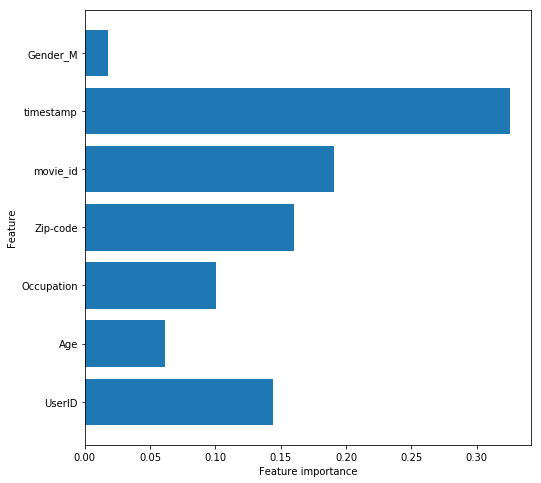

In [79]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plot_feature_importances(forest_amount)

In [82]:
print('Train Forest Score: ', forest_amount.score(X_train, y_train)) # Accuracy of training data
print('Test Forest Score:', forest_amount.score(X_test, y_test))

Train Forest Score:  0.4360843017530037
Test Forest Score: 0.3942282058117835


In [83]:
forest_pred = forest_amount.predict(X_test)


In [85]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, forest_pred))
print('/n')
print(classification_report(y_test, forest_pred))

[[  86   43  160  545   60]
 [  68   78  394 1094   55]
 [  47   52  757 2973  142]
 [  15   15  449 4529  231]
 [  20    7  160 2559  465]]
/n
              precision    recall  f1-score   support

           1       0.36      0.10      0.15       894
           2       0.40      0.05      0.08      1689
           3       0.39      0.19      0.26      3971
           4       0.39      0.86      0.53      5239
           5       0.49      0.14      0.22      3211

    accuracy                           0.39     15004
   macro avg       0.41      0.27      0.25     15004
weighted avg       0.41      0.39      0.32     15004

